# RE task 기초 베이스라인

- Task : KLUE-RE
- 담당자: 이승미 님
- 최종수정일: 21-09-15
- 본 자료는 가짜연구소 3기 KLUE 로 모델 평가하기 크루 활동으로 작성됨

# 00 Relation Task

- 목표 : - 모델이 적합하게 두 개체의 관계를 이해했는지 평가하기에 적합
- 데이터 구성 : 위키피디아, 위키트리(뉴스 도메인), 정책 브리핑(뉴스 도메인)
  - Train : 32470
  - Dev : 7765
  - Test : 7766
- 평가지표 :
  - Micro F1 : Major Negative class(no relation) 을 제외하고 score 측정
  - AUPRC(area under the precision-recall curve) : x축을 Recall, y축을 Precision으로 설정하여 그린 곡선 아래의 면적 값인 모델 평가
- Relation
  - person-related relations 18개
  - organization-related relations 11개
  - no_relation
  
  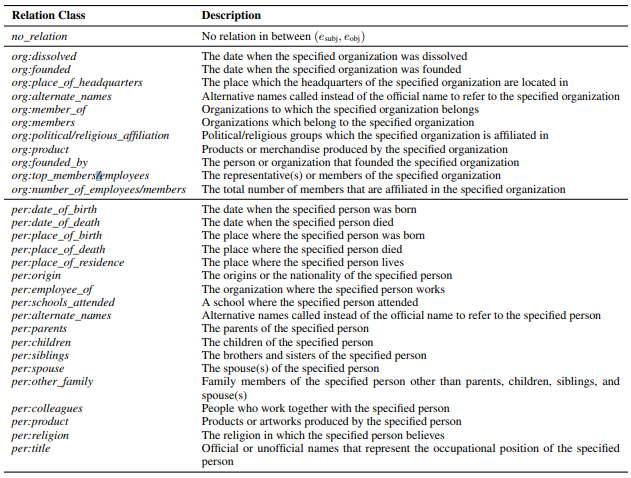

# 01 init
공식 KLUE github 의 [KLUE-baseline](https://github.com/KLUE-benchmark/KLUE-baseline) 을 바탕으로 작성

---

## Install packages

공식 KLUE github에서 pipline과 dataset을 clon

In [ ]:
!git clone --recursive https://github.com/KLUE-benchmark/KLUE-Baseline.git

Cloning into 'KLUE-Baseline'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 74 (delta 18), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (74/74), done.
Submodule 'data' (https://github.com/KLUE-benchmark/KLUE) registered for path 'data'
Cloning into '/content/KLUE-Baseline/data'...
remote: Enumerating objects: 154, done.        
remote: Counting objects: 100% (154/154), done.        
remote: Compressing objects: 100% (134/134), done.        
remote: Total 154 (delta 42), reused 42 (delta 4), pack-reused 0        
Receiving objects: 100% (154/154), 41.65 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Submodule path 'data': checked out '1cc52e64c0e0b6915577244f7439c55a42199a64'


In [ ]:
!pip install -r KLUE-Baseline/requirements.txt

Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     |████████████████████████████████| 776.7 MB 4.6 kB/s 
     |████████████████████████████████| 1.3 MB 38.0 MB/s 
     |████████████████████████████████| 665 kB 38.7 MB/s 
     |████████████████████████████████| 108 kB 51.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 2.9 MB 40.4 MB/s 
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 
     |████████████████████████████████| 829 kB 33.7 MB/s 
     |████████████████████████████████| 636 kB 37.8 MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl size=10186 sha256=1856d718b4354bc7d87fb0bb6922c02fa647b49d6d85eb24130fe7eb759daf04
  Stored in directory: /root/.cache/pip/wheels/3a/0d/38/01a9bc6e20dcfaf0a6a7b552d03137558ba1c38aea47644682
  Created wheel 

In [ ]:
!pip install pytorch-lightning==1.2.2 torchtext==0.8.0 torch==1.7.1

     |████████████████████████████████| 816 kB 10.9 MB/s 
     |████████████████████████████████| 6.9 MB 1.2 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 269 kB 43.1 MB/s 
     |████████████████████████████████| 1.3 MB 39.6 MB/s 
     |████████████████████████████████| 142 kB 43.8 MB/s 
     |████████████████████████████████| 294 kB 45.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=a549b6783a2c91e8df5d04fb4c3a55b7d289885ace3bcb6db176cedde3f7583c
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1
 

## dataset

KLUE RE 데이터셋 
- Train : klue-re-v1.1_train.json
- Dev : klue-re-v1.1_dev.json

In [ ]:
import os
import json

dataset_path = os.path.join('/content/KLUE-Baseline/data/klue_benchmark/klue-re-v1.1/klue-re-v1.1_train.json')
with open(dataset_path, "r", encoding="utf-8") as f:
    dataset = json.load(f)

- label
- object_entity \
  subject entity 
  - index
  - type
  - word
- source
- sentence

In [ ]:
dataset[0]

{'guid': 'klue-re-v1_train_00000',
 'label': 'no_relation',
 'object_entity': {'end_idx': 18,
  'start_idx': 13,
  'type': 'PER',
  'word': '조지 해리슨'},
 'sentence': '〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.',
 'source': 'wikipedia',
 'subject_entity': {'end_idx': 26,
  'start_idx': 24,
  'type': 'ORG',
  'word': '비틀즈'}}

## Input
- 문장
- Entity Span에 대한 정보
  - entity의 위치 (start idx, end idx)
  - entity의 위치를 표현하기 위해서 entity special token을 이용
  ex) `<obj>`마크 주커버그`<obj>` 는 2004년 `<subj>` 페이스북 `</subj>` 을 설립했다.

In [ ]:
import sys

sys.path.insert(0, '/content/KLUE-Baseline/klue_baseline/data')

In [ ]:
import argparse
import json
import logging
import os
from typing import Any, List, Optional, Tuple

import torch
from overrides import overrides
from torch.utils.data import TensorDataset
from transformers import PreTrainedTokenizer

from base import DataProcessor, InputExample, InputFeatures, KlueDataModule

Checks tokenizer type \
- 해당 baselinde에서는 wordpiece, sentencepiece 만 지원

In [ ]:
import logging
from typing import List, Optional, Union

import transformers
from transformers import PreTrainedTokenizer

logger = logging.getLogger(__name__)

def check_tokenizer_type(tokenizer: PreTrainedTokenizer) -> str:

    if isinstance(tokenizer, transformers.XLMRobertaTokenizer):
        logger.info(f"Using {type(tokenizer).__name__} for fixing tokenization result")
        return "xlm-sp"  # Sentencepiece
    elif isinstance(tokenizer, transformers.BertTokenizer):
        logger.info(f"Using {type(tokenizer).__name__} for fixing tokenization result")
        return "bert-wp"  # Wordpiece (including BertTokenizer & ElectraTokenizer)
    else:
        logger.warn(
            "If you are using other tokenizer (e.g. bbpe), you should change code in `fix_tokenization_error()`"
        )
        return "other"

`<obj>`  `<subj>` 토큰 추가

In [ ]:
class KlueREProcessor(DataProcessor):

    datamodule_type = KlueDataModule

    def __init__(self, tokenizer: PreTrainedTokenizer) -> None:
        super().__init__(self, tokenizer)

        # special tokens to mark the subject/object entity boundaries
        self.subject_start_marker = "<subj>"
        self.subject_end_marker = "</subj>"
        self.object_start_marker = "<obj>"
        self.object_end_marker = "</obj>"

        self.tokenizer.add_special_tokens(
            {
                "additional_special_tokens": [
                    self.subject_start_marker,
                    self.subject_end_marker,
                    self.object_start_marker,
                    self.object_end_marker,
                ]
            }
        )

        # Load relation class
        relation_class_file_path = os.path.join('/content/KLUE-Baseline/data/klue_benchmark/klue-re-v1.1/relation_list.json')

        with open(relation_class_file_path, "r", encoding="utf-8") as f:
            self.relation_class = json.load(f)["relations"]

        # Check type of tokenizer
        self.tokenizer_type = check_tokenizer_type(tokenizer)

    overrides
    def get_labels(self) -> Any:
        return self.relation_class
    

    def _create(self, data) -> List[InputExample]:
        examples = []
        guid = data["guid"]
        text = data["sentence"]
        subject_entity = data["subject_entity"]
        object_entity = data["object_entity"]
        label = data["label"]

        text = self._mark_entity_spans(
            text=text,
            subject_range=(int(subject_entity["start_idx"]), int(subject_entity["end_idx"])),
            object_range=(int(object_entity["start_idx"]), int(object_entity["end_idx"])),
        )
        examples.append(InputExample(guid=guid, text_a=text, label=label))

        return examples

    def _mark_entity_spans(
        self,
        text: str,
        subject_range: Tuple[int, int],
        object_range: Tuple[int, int],
    ) -> str:
        """Adds entity markers to the text to identify the subject/object entities.
        Args:
            text: Original sentence
            subject_range: Pair of start and end indices of subject entity
            object_range: Pair of start and end indices of object entity
        Returns:
            A string of text with subject/object entity markers
        """
        if subject_range < object_range:
            segments = [
                text[: subject_range[0]],
                self.subject_start_marker,
                text[subject_range[0] : subject_range[1] + 1],
                self.subject_end_marker,
                text[subject_range[1] + 1 : object_range[0]],
                self.object_start_marker,
                text[object_range[0] : object_range[1] + 1],
                self.object_end_marker,
                text[object_range[1] + 1 :],
            ]
        elif subject_range > object_range:
            segments = [
                text[: object_range[0]],
                self.object_start_marker,
                text[object_range[0] : object_range[1] + 1],
                self.object_end_marker,
                text[object_range[1] + 1 : subject_range[0]],
                self.subject_start_marker,
                text[subject_range[0] : subject_range[1] + 1],
                self.subject_end_marker,
                text[subject_range[1] + 1 :],
            ]
        else:
            raise ValueError("Entity boundaries overlap.")

        marked_text = "".join(segments)

        return marked_text

    def _convert_example_to_features(self, examples: List[InputExample]) -> List[InputFeatures]:
        max_length = 128
        if max_length is None:
            max_length = self.tokenizer.max_len

        label_map = {label: i for i, label in enumerate(self.get_labels())}
        labels = [label_map[example.label] for example in examples]

        def fix_tokenization_error(text: str, tokenizer_type: str) -> Any:
            """Fix the tokenization due to the `obj` and `subj` marker inserted
            in the middle of a word.
            Example:
                >>> text = "<obj>조지 해리슨</obj>이 쓰고 <subj>비틀즈</subj>가"
                >>> tokens = ['<obj>', '조지', '해리', '##슨', '</obj>', '이', '쓰', '##고', '<subj>', '비틀즈', '</subj>', '가']
                >>> fix_tokenization_error(text, tokenizer_type="bert-wp")
                ['<obj>', '조지', '해리', '##슨', '</obj>', '##이', '쓰', '##고', '<subj>', '비틀즈', '</subj>', '##가']
            """
            tokens = self.tokenizer.tokenize(text)
            # subject
            if text[text.find(self.subject_end_marker) + len(self.subject_end_marker)] != " ":
                space_idx = tokens.index(self.subject_end_marker) + 1
                if tokenizer_type == "xlm-sp":
                    if tokens[space_idx] == "▁":
                        tokens.pop(space_idx)
                    elif tokens[space_idx].startswith("▁"):
                        tokens[space_idx] = tokens[space_idx][1:]
                elif tokenizer_type == "bert-wp":
                    if not tokens[space_idx].startswith("##") and "가" <= tokens[space_idx][0] <= "힣":
                        tokens[space_idx] = "##" + tokens[space_idx]

            # object
            if text[text.find(self.object_end_marker) + len(self.object_end_marker)] != " ":
                space_idx = tokens.index(self.object_end_marker) + 1
                if tokenizer_type == "xlm-sp":
                    if tokens[space_idx] == "▁":
                        tokens.pop(space_idx)
                    elif tokens[space_idx].startswith("▁"):
                        tokens[space_idx] = tokens[space_idx][1:]
                elif tokenizer_type == "bert-wp":
                    if not tokens[space_idx].startswith("##") and "가" <= tokens[space_idx][0] <= "힣":
                        tokens[space_idx] = "##" + tokens[space_idx]

            return tokens

        tokenized_examples = [fix_tokenization_error(example.text_a, self.tokenizer_type) for example in examples]
        batch_encoding = self.tokenizer.batch_encode_plus(
            [(self.tokenizer.convert_tokens_to_ids(tokens), None) for tokens in tokenized_examples],
            max_length=max_length,
            padding="max_length",
            truncation=True,
        )

        features = []
        for i in range(len(examples)):
            inputs = {k: batch_encoding[k][i] for k in batch_encoding}

            feature = InputFeatures(**inputs, label=labels[i])
            features.append(feature)

        for i in range(1):
            print("*** Example ***")
            print("guid: %s" % (examples[i].guid))
            print("origin example: %s" % examples[i])
            print("origin tokens: %s" % self.tokenizer.tokenize(examples[i].text_a))
            print("fixed tokens: %s" % tokenized_examples[i])
            print("features: %s" % features[i])

        return features

    def _create_dataset(self, data) -> TensorDataset:
        examples = self._create(data)
        features = self._convert_example_to_features(examples)

        all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
        all_attention_mask = torch.tensor([f.attention_mask for f in features], dtype=torch.long)
        # Some model does not make use of token type ids (e.g. RoBERTa)
        all_token_type_ids = torch.tensor(
            [0 if f.token_type_ids is None else f.token_type_ids for f in features], dtype=torch.long
        )
        all_labels = torch.tensor([f.label for f in features], dtype=torch.long)

        return TensorDataset(all_input_ids, all_attention_mask, all_token_type_ids, all_labels)

 데이터 input 형식 확인

In [ ]:
data = {
        "guid": "klue-re-v1_dev_00014",
        "sentence": "엠비아이는 ‘서울국제발명전시회’에서 '파워트레인(POWERTRAIN)\"'으로 영예의 대상을 차지했다.",
        "subject_entity": {
            "word": "엠비아이",
            "start_idx": 0,
            "end_idx": 3,
            "type": "ORG"
        },
        "object_entity": {
            "word": "파워트레인",
            "start_idx": 21,
            "end_idx": 25,
            "type": "POH"
        },
        "label": "org:product",
        "source": "wikitree"
    }

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('monologg/koelectra-base-v3-discriminator')

processor = KlueREProcessor(tokenizer)
processor._create_dataset(data)

*** Example ***
guid: klue-re-v1_dev_00014
origin example: InputExample(guid='klue-re-v1_dev_00014', text_a='<subj>엠비아이</subj>는 ‘서울국제발명전시회’에서 \'<obj>파워트레인</obj>(POWERTRAIN)"\'으로 영예의 대상을 차지했다.', text_b=None, label='org:product')
origin tokens: ['<subj>', '엠', '##비아', '##이', '</subj>', '는', '‘', '서울', '##국', '##제', '##발', '##명', '##전', '##시', '##회', '’', '에서', "'", '<obj>', '파워', '##트', '##레인', '</obj>', '(', 'PO', '##W', '##ER', '##TRA', '##IN', ')', '"', "'", '으로', '영예', '##의', '대상', '##을', '차지', '##했', '##다', '.']
fixed tokens: ['<subj>', '엠', '##비아', '##이', '</subj>', '##는', '‘', '서울', '##국', '##제', '##발', '##명', '##전', '##시', '##회', '’', '에서', "'", '<obj>', '파워', '##트', '##레인', '</obj>', '(', 'PO', '##W', '##ER', '##TRA', '##IN', ')', '"', "'", '으로', '영예', '##의', '대상', '##을', '차지', '##했', '##다', '.']
features: InputFeatures(input_ids=[2, 35000, 3134, 8318, 4007, 35001, 4034, 144, 6265, 4113, 4106, 4387, 4282, 4068, 4114, 4213, 145, 6215, 11, 35002, 9198, 4039, 10007, 35003, 12, 2150

# 02 Train

KLUE에서 공개한 사전 학습 시킨 RoBERTa, BERT를 통해서 Train

metric_key 
- micro f1
- auprc

In [ ]:
!python KLUE-Baseline/run_klue.py \
train \
--task klue-re \
--output_dir ./re \
--data_dir ./KLUE-Baseline/data/klue_benchmark/klue-re-v1.1 \
--model_name_or_path klue/roberta-base \
--learning_rate 2e-5 \
--num_train_epochs 4 \
--train_batch_size 32 \
--eval_batch_size 16 \
--warmup_ratio 0.2 \
--patience 10000 \
--max_seq_length 256 \
--metric_key auprc \
--gpus 0 \

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: MetricBase will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
09/29/2021 09:49:28 - INFO - __main__ - Arguments:
09/29/2021 09:49:28 - INFO - __main__ - 	                command : train
09/29/2021 09:49:28 - INFO - __main__ - 	                   task : klue-re
09/29/2021 09:49:28 - INFO - __main__ - 	             output_dir : ./re
09/29/2021 09:49:28 - INFO - __main__ - 	                   gpus : [0]
09/29/2021 09:49:28 - INFO - __main__ - 	                   fp16 : False
09/29/2021 09:49:28 - INFO - __main__ - 	   num_sanity_val_steps : 2
09/29/2021 09:49:28 - INFO - __main__ - 	              tpu_cores : None
09/29/2021 09:49:28 - INFO - __main__ - 	      gradient_clip_val : 1.0
09/29/2021 09:49:28 - INFO - __main__ - 	accumulate_grad_batches : 1
09/29/2021 09:49:28 - INFO - __main__ - 	           

# 03 Test



In [ ]:
!python KLUE-Baseline/run_klue.py \
evaluate \
--task klue-re \
--output_dir ./re/klue-re \
--data_dir ./KLUE-Baseline/data/klue_benchmark/klue-re-v1.1 \
--model_name_or_path ./re/klue-re/version_2/transformers \
--eval_batch_size 32 \

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: MetricBase will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
09/29/2021 11:08:23 - INFO - __main__ - Arguments:
09/29/2021 11:08:23 - INFO - __main__ - 	                command : evaluate
09/29/2021 11:08:23 - INFO - __main__ - 	                   task : klue-re
09/29/2021 11:08:23 - INFO - __main__ - 	             output_dir : ./re/klue-re
09/29/2021 11:08:23 - INFO - __main__ - 	                   gpus : None
09/29/2021 11:08:23 - INFO - __main__ - 	                   fp16 : False
09/29/2021 11:08:23 - INFO - __main__ - 	   num_sanity_val_steps : 2
09/29/2021 11:08:23 - INFO - __main__ - 	              tpu_cores : None
09/29/2021 11:08:23 - INFO - __main__ - 	      gradient_clip_val : 1.0
09/29/2021 11:08:23 - INFO - __main__ - 	accumulate_grad_batches : 1
09/29/2021 11:08:23 - INFO - __main__ - 